In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
targetDir = "../data/output/2016-10-06_17:58:18/"

## 全データをブラウズ

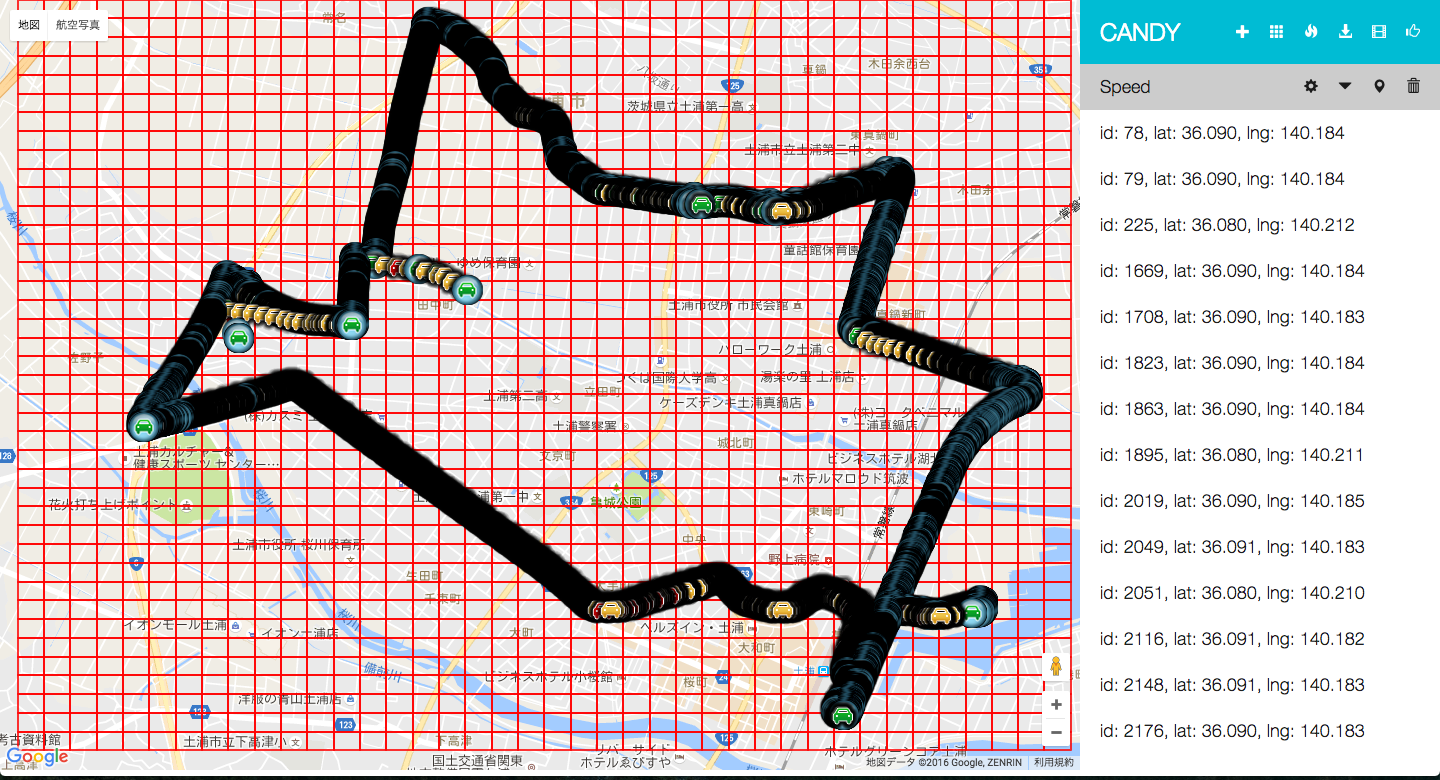

In [5]:
from IPython.display import Image
image = Image(targetDir + 'AllSpeed.png')
image

In [6]:
df = pd.read_csv(targetDir + "result.csv")

### 条件式
```
Speed < 10 => stop
Speed > 10 and Speed < 30 => green
Speed > 30 and Speed < 60 => yellow
Speed > 60 => red
```

 ### グリッド数
 40 $\times$ 40 = 1600

In [7]:
df = df[['red', 'green', 'yellow', 'stop']]
df.describe()

,red,green,yellow,stop
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.986250,8.573125,17.277500,15.496875
std,16.837146,48.958569,61.349504,125.961473
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,188.000000,709.000000,543.000000,2380.000000


In [8]:
df[df['red'] + df['yellow'] + df['green'] + df['stop'] == 0].count()

red       1406
green     1406
yellow    1406
stop      1406
dtype: int64

## 一つ以上マーカーが入っている値だけ取り出す

In [9]:
availables = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]

In [10]:
availables.describe()

,red,green,yellow,stop
count,194.000000,194.000000,194.000000,194.000000
mean,24.628866,70.706186,142.494845,127.809278
std,42.578259,124.268434,115.097312,342.086072
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,36.750000,0.000000
50%,3.000000,5.000000,136.500000,1.000000
75%,26.750000,94.750000,218.500000,26.500000
max,188.000000,709.000000,543.000000,2380.000000


## Pair plot

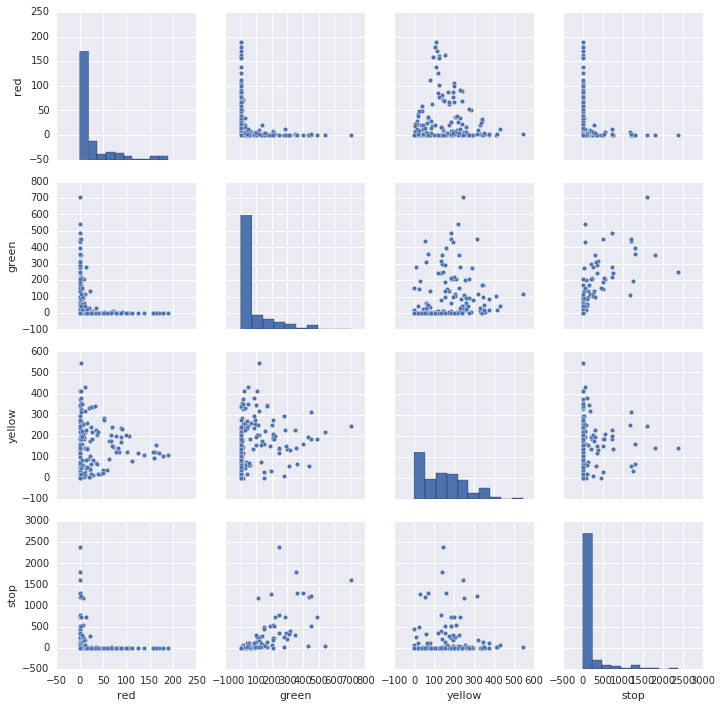

In [11]:
sns.pairplot(availables)

## 各特徴量をブラウズ
1. Top 10
2. ヒストグラム
3. 0 以上の個数

### Red

In [12]:
availables.sort_values('red', ascending=False)[:10]

,red,green,yellow,stop
1220,188,0,109,0
1181,179,0,104,0
1142,179,0,104,0
1103,170,0,116,0
1259,163,0,155,0
1064,161,0,123,0
986,159,0,94,0
1025,158,0,94,0
1295,156,0,125,0
947,138,0,111,0


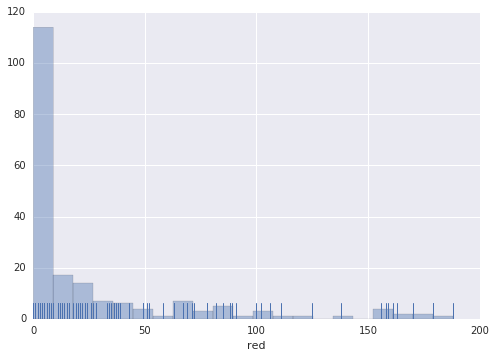

In [13]:
sns.distplot(availables["red"], kde=False, rug=True)

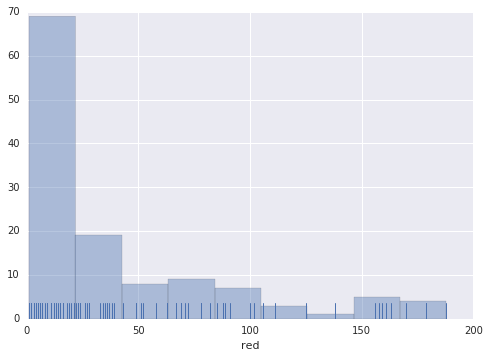

In [14]:
sns.distplot(availables[availables["red"] > 0]["red"], kde=False, rug=True)

In [15]:
availables[availables["red"] == 0].count()

red       69
green     69
yellow    69
stop      69
dtype: int64

### Yellow

In [16]:
availables.sort_values('yellow', ascending=False)[:10]

,red,green,yellow,stop
1488,3,114,543,13
1367,12,44,432,55
449,3,18,413,7
103,0,104,412,11
882,3,84,377,107
142,1,17,374,1
1324,3,7,355,1
1325,5,17,352,8
418,3,48,350,11
407,3,168,345,144


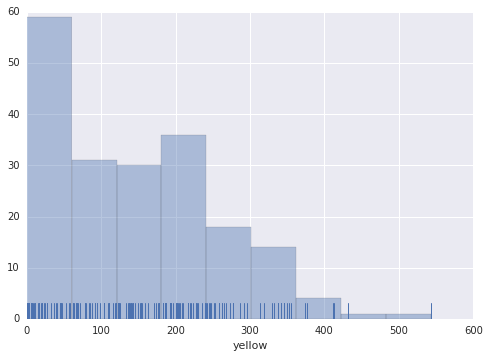

In [17]:
sns.distplot(availables["yellow"], kde=False, rug=True)

In [18]:
availables[availables["yellow"] == 0].count()

red       7
green     7
yellow    7
stop      7
dtype: int64

### Green

In [19]:
availables.sort_values('green', ascending=False)[:10]

,red,green,yellow,stop
1528,0,709,247,1609
586,0,543,220,43
454,0,489,186,729
1326,3,453,314,1214
406,0,448,187,509
841,0,439,57,1197
453,0,435,194,47
874,0,398,159,1307
955,0,358,68,1295
527,0,352,140,1802


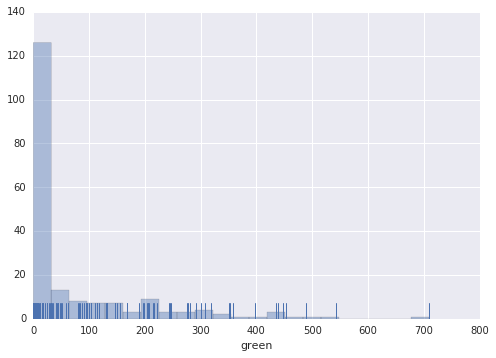

In [20]:
sns.distplot(availables["green"], kde=False, rug=True)

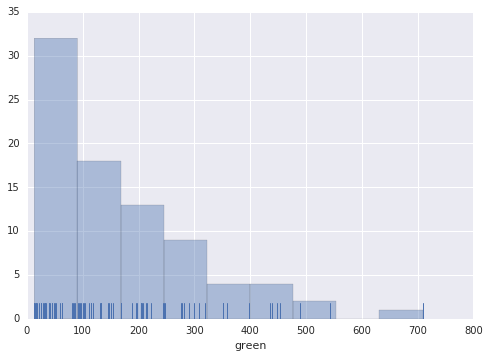

In [21]:
sns.distplot(availables[availables["green"] > 10]["green"], kde=False, rug=True)

In [22]:
availables[availables["green"] == 0].count()

red       70
green     70
yellow    70
stop      70
dtype: int64

### Stop

In [23]:
availables.sort_values('stop', ascending=False)[:10]

,red,green,yellow,stop
1323,0,247,143,2380
527,0,352,140,1802
1528,0,709,247,1609
874,0,398,159,1307
955,0,358,68,1295
631,0,196,32,1264
1326,3,453,314,1214
841,0,439,57,1197
671,6,111,251,1187
688,0,246,137,763


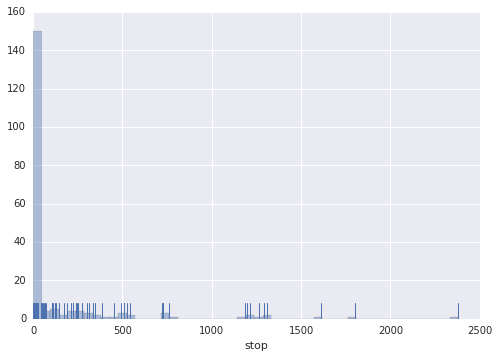

In [24]:
sns.distplot(availables["stop"], kde=False, rug=True)

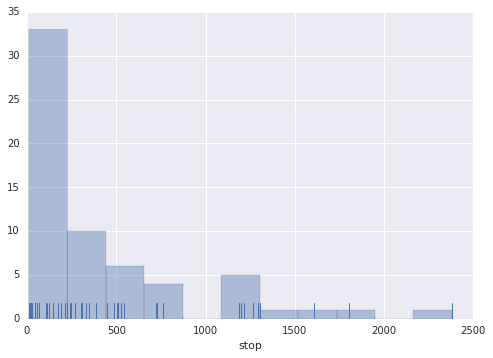

In [25]:
sns.distplot(availables[availables["stop"] > 10]["stop"], kde=False, rug=True)

In [26]:
availables[availables["stop"] == 0].count()

red       94
green     94
yellow    94
stop      94
dtype: int64

## 正規化

In [27]:
def norm(x):
    return(x - x.min()) / (x.max() - x.min())
    
    
nf = availables.apply(norm, axis=0).fillna(0)

## 共分散

In [28]:
nf.cov()

,red,green,yellow,stop
red,0.051293,-0.012001,-0.000030,-0.006534
green,-0.012001,0.030721,0.008337,0.017623
yellow,-0.000030,0.008337,0.044929,0.001716
stop,-0.006534,0.017623,0.001716,0.020659


In [29]:
nf.describe()

,red,green,yellow,stop
count,194.000000,194.000000,194.000000,194.000000
mean,0.131005,0.099727,0.262421,0.053701
std,0.226480,0.175273,0.211966,0.143734
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.067680,0.000000
50%,0.015957,0.007052,0.251381,0.000420
75%,0.142287,0.133639,0.402394,0.011134
max,1.000000,1.000000,1.000000,1.000000


## K-means でクラスタリング

In [30]:
kmeans = KMeans(n_clusters=5).fit(nf)

In [31]:
kmeans.cluster_centers_

array([[  3.86303191e-01,   3.05594734e-03,   3.42925107e-01,
          3.85154062e-04],
       [  4.78041462e-02,   1.71964848e-02,   6.79510790e-02,
          8.17711700e-03],
       [  7.36497545e-03,   4.68156667e-01,   2.94092648e-01,
          3.31835811e-01],
       [  8.36436170e-01,   1.38777878e-17,   2.04573358e-01,
          0.00000000e+00],
       [  4.04846336e-02,   1.06670846e-01,   5.05149717e-01,
          2.11718021e-02]])

In [32]:
pred = zip(nf.index, kmeans.predict(nf))

In [33]:
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1

In [34]:
np.savetxt(targetDir + "clusters.csv", result, delimiter=",", fmt="%d")